In [83]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data

In [84]:
DATA_PATH = "data2/data_tu-helpfulness-of-xai_2022-06-29_10-48.xlsx"
DATA_PREPARED_PATH = f"{DATA_PATH.split('.')[0]}_PREPARED.{DATA_PATH.split('.')[1]}"
df = pd.read_excel(DATA_PATH)
df_prepared = pd.read_excel(DATA_PREPARED_PATH)


# Demographic questions: Create charts (visual overview)

In [85]:
df_prepared = df_prepared.drop_duplicates(subset=["case"]).reset_index(drop=True)

In [86]:
df_prepared

,Unnamed: 0,case,Education,Education: Other,ML Experience,XAI Experience,Color Blindness,Color Blindness: Yes,Visual Impairment Affect,Feedback Form: [01],question_code,response,label,img_idx,model,method,is_pred_correct
0,0,579,Highschool,NaN,Not at all,NaN,No,NaN,NaN,NaN,B715,False,chiffonier,4389,alex,SHAP,True
1,456,581,Graduate,NaN,Between 3 and 5 years,Very helpful,No,NaN,NaN,NaN,C323,True,cassette_player,4266,vgg,SHAP,False
2,715,587,Highschool,NaN,Not at all,NaN,No,NaN,NaN,NaN,C222,True,spotlight,7995,vgg,SHAP,False
3,1064,589,Graduate,NaN,Under 1 year,Somewhat helpful,No,NaN,NaN,NaN,B204,True,coral_reef,9710,alex,SHAP,True
4,1496,605,Highschool,NaN,Not at all,NaN,No,NaN,NaN,NaN,B302,True,coral_reef,9710,alex,LIME,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,199,1626,Undergraduate,NaN,Under 1 year,Somewhat helpful,No,NaN,NaN,NaN,B704,False,Boston_bull,1073,alex,SHAP,False
132,2743,1654,Highschool,NaN,Not at all,NaN,No,NaN,NaN,NaN,B517,True,bookcase,3944,alex,LRP,False
133,1724,1656,Undergraduate,NaN,Under 1 year,Somewhat helpful,No,NaN,NaN,NaN,B107,False,shopping_cart,7692,vgg,IntegratedGradients,True
134,3253,1658,Graduate,NaN,Under 1 year,Somewhat helpful,No,NaN,NaN,NaN,B603,True,boathouse,3898,alex,IntegratedGradients,False


In [87]:
def func(pct):
    return "{:1.1f}%".format(pct)

In [88]:
def my_fmt(x):
    print(x)
    return '{:.4f}%\n({:.0f})'.format(x, total*x/100)

In [89]:
def plot_statistics():
    fig, ax = plt.subplots(3, 2, figsize=(20, 30))
    ax[0][0].pie(autopct=lambda pct: func(pct), labels=df_prepared["Education"].value_counts(dropna=False, normalize=True).index, x=df_prepared["Education"].value_counts(dropna=False, normalize=False), textprops={"size": 18})
    ax[0][0].set_title("Education", size= 25)
    
    ax[0][1].pie(autopct=lambda pct: func(pct), labels=df_prepared["ML Experience"].value_counts(dropna=False, normalize=True).index, x=df_prepared["ML Experience"].value_counts(dropna=False, normalize=False), textprops={"size": 18})
    ax[0][1].set_title("ML Experience", size= 25)
    
    ax[1][0].pie(autopct=lambda pct: func(pct), labels=df_prepared["XAI Experience"].value_counts(dropna=True, normalize=True).index, x=df_prepared["XAI Experience"].value_counts(dropna=True, normalize=False), textprops={"size": 18})
    ax[1][0].set_title("XAI Experience (Excluding NaN)", size= 25)
    
    ax[1][1].pie(autopct=lambda pct: func(pct), labels=df_prepared["Color Blindness"].value_counts(dropna=False, normalize=True).index, x=df_prepared["Color Blindness"].value_counts(dropna=False, normalize=False), textprops={"size": 18})
    ax[1][1].set_title("Color Blindness", size= 25)
    
    ax[2][0].pie(autopct=lambda pct: func(pct), labels=df_prepared["Visual Impairment Affect"].value_counts(dropna=True, normalize=True).index, x=df_prepared["Visual Impairment Affect"].value_counts(dropna=True, normalize=False), textprops={"size": 18})
    ax[2][0].set_title("Visual Impairment Affect (Excluding NaN)", size= 25)
    
    fig.suptitle(f"Statistics calculated on a total of {df_prepared.shape[0]} participant", size=35)

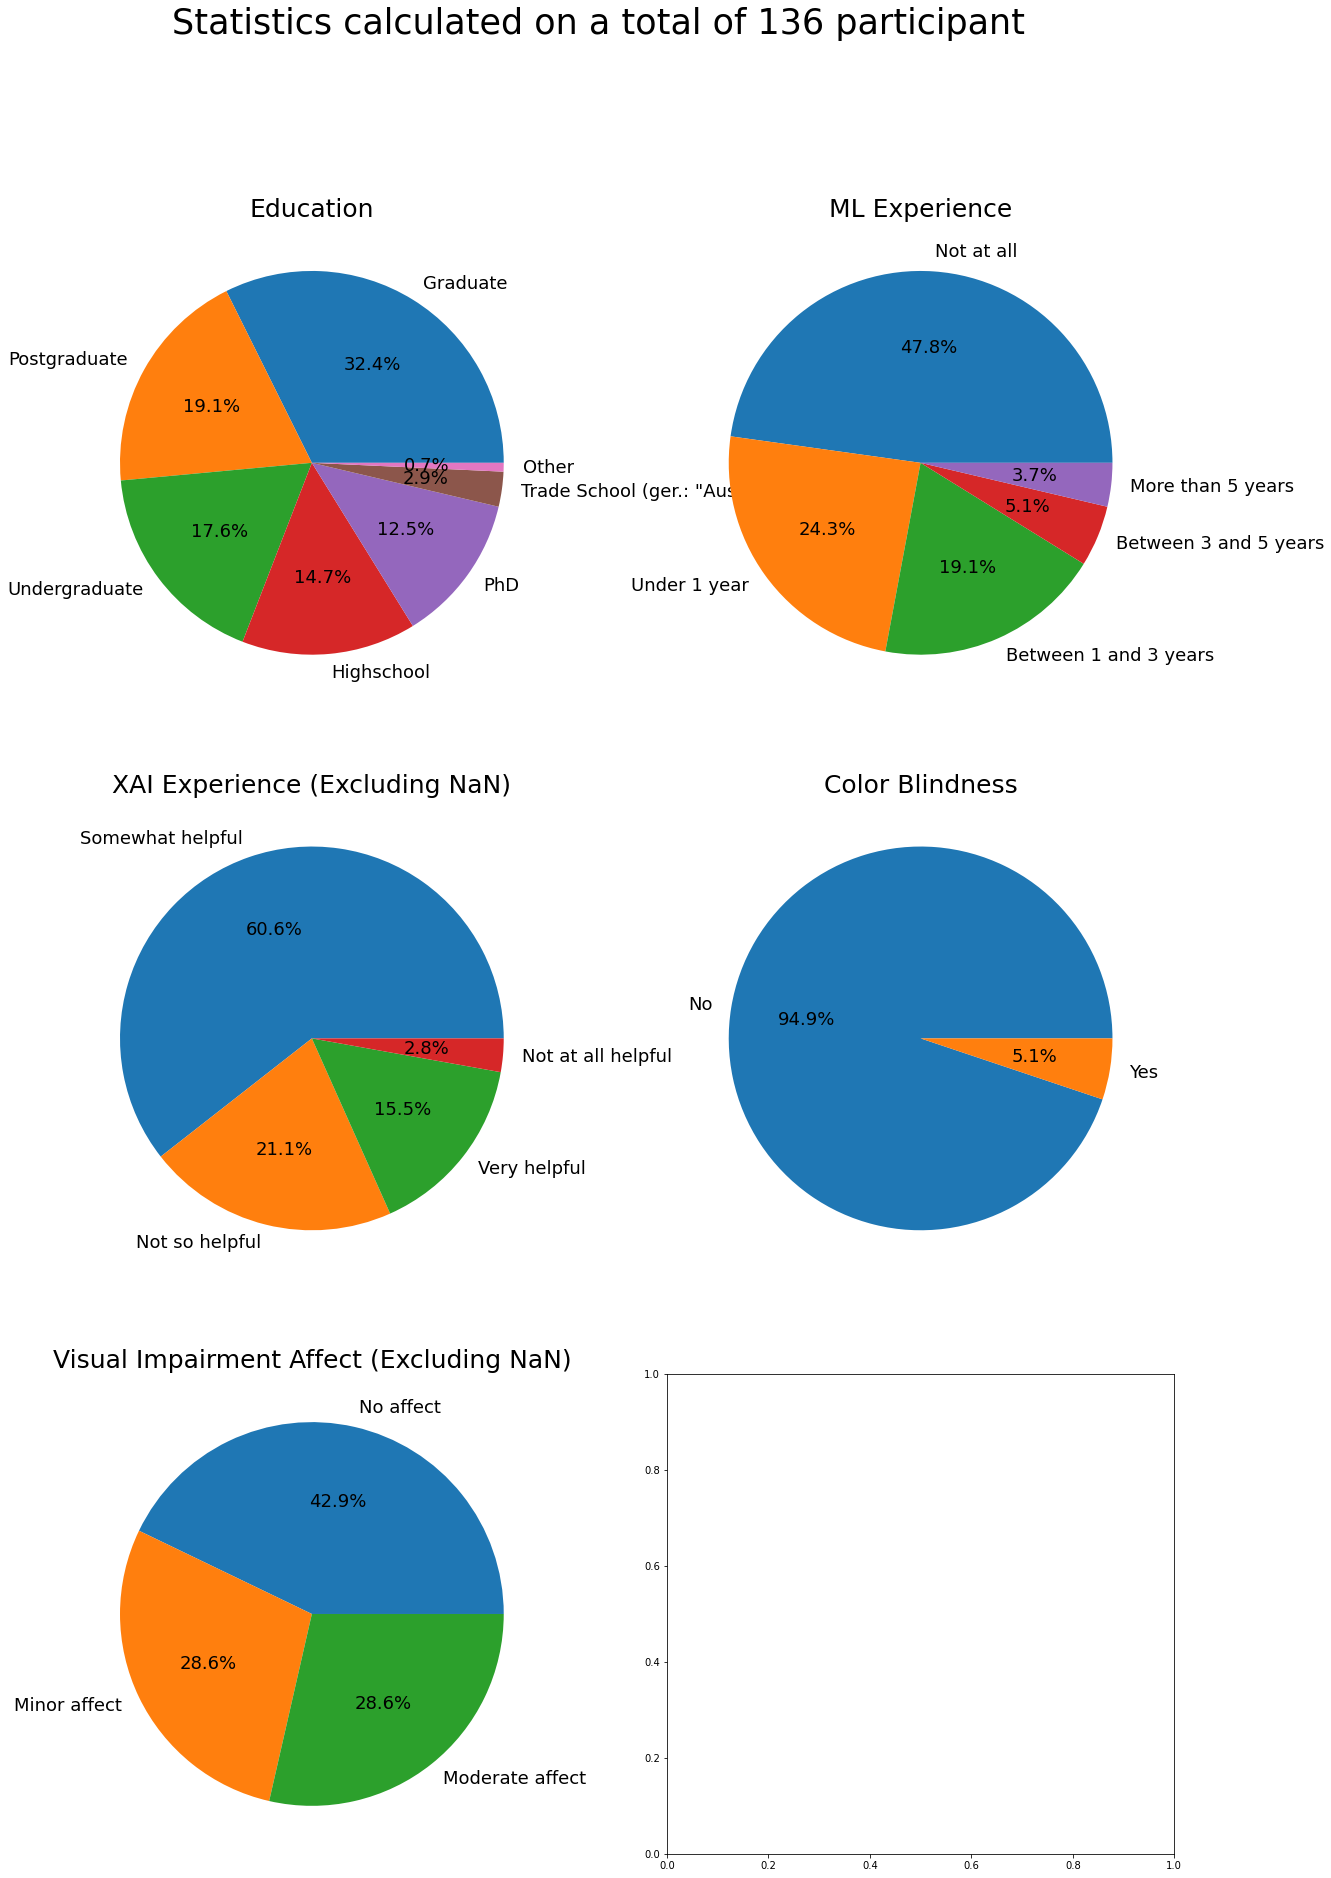

In [90]:
plot_statistics()

# Time taken to finish survey


In [91]:
df_column_descriptions = df.loc[0]

In [92]:
df = df.drop(0)

In [93]:
# set dtypes for TIME columns from object to integer
df_time = df.astype(dict(zip(df.columns[df.columns.get_loc("TIME001"):df.columns.get_loc("TIME001")+6], [int]*6)))
df_time.head()

,CASE,SERIAL,REF,QUESTNNR,MODE,STARTED,B101,B102,B103,B104,...,MAILSENT,LASTDATA,FINISHED,Q_VIEWER,LASTPAGE,MAXPAGE,MISSING,MISSREL,TIME_RSI,DEG_TIME
1,579,CASE000578,578,bogen7,interview,2022-06-13 15:44:02,NaN,NaN,NaN,NaN,...,NaN,2022-06-13 15:46:48,1,0,5,5,4,1,2.09,66
2,581,CASE000580,580,bogen12,interview,2022-06-13 15:44:06,NaN,NaN,NaN,NaN,...,NaN,2022-06-13 15:46:27,1,0,5,5,3,1,2.14,79
3,587,CASE000586,586,bogen11,interview,2022-06-13 15:44:26,NaN,NaN,NaN,NaN,...,NaN,2022-06-13 15:48:03,1,0,5,5,4,1,1.64,34
4,589,CASE000588,588,bogen2,interview,2022-06-13 15:45:57,NaN,NaN,NaN,NaN,...,NaN,2022-06-13 15:48:13,1,0,5,5,7,1,1.99,209
5,605,CASE000604,604,bogen3,interview,2022-06-13 15:54:10,NaN,NaN,NaN,NaN,...,NaN,2022-06-13 16:07:48,1,0,5,5,4,1,0.61,0


In [94]:
t_time = (df_time.LASTDATA - df_time.STARTED)
df_time['timespent'] = t_time.astype(str).map(lambda x: x[7:])
df_time['time_in_sec'] =  t_time
#df_time.assign(TIMESPENT = t_time)

In [97]:
df_time = df_time.groupby('CASE')['timespent'].apply(list)
df_time

CASE
579     [00:02:46]
581     [00:02:21]
587     [00:03:37]
589     [00:02:16]
605     [00:13:38]
           ...    
1626    [00:09:07]
1654    [00:05:16]
1656    [00:09:22]
1658    [00:03:33]
1660    [00:03:43]
Name: timespent, Length: 136, dtype: object

In [98]:
for i in df_time:
    print(i)

['00:02:46']
['00:02:21']
['00:03:37']
['00:02:16']
['00:13:38']
['00:02:35']
['00:05:39']
['00:03:28']
['00:07:02']
['00:02:43']
['00:06:40']
['00:06:48']
['00:02:04']
['00:07:09']
['05:49:42']
['03:17:48']
['00:02:48']
['00:17:49']
['00:05:42']
['00:02:46']
['00:08:50']
['00:07:49']
['00:04:58']
['00:04:11']
['00:13:53']
['00:01:55']
['00:08:35']
['00:06:16']
['00:01:31']
['00:04:26']
['00:08:01']
['00:02:26']
['00:02:44']
['00:08:07']
['00:07:46']
['00:09:22']
['00:05:31']
['00:14:33']
['00:05:11']
['00:03:48']
['00:06:30']
['00:03:54']
['00:04:12']
['00:04:40']
['00:03:23']
['00:13:16']
['00:20:06']
['00:09:21']
['00:04:24']
['00:04:05']
['00:07:41']
['00:04:56']
['00:06:23']
['00:03:24']
['00:07:36']
['00:09:18']
['00:05:36']
['00:19:42']
['00:18:21']
['00:06:04']
['00:06:18']
['00:14:56']
['00:09:45']
['00:06:26']
['00:03:50']
['00:08:51']
['00:03:01']
['00:08:58']
['00:06:44']
['00:16:20']
['00:10:24']
['00:08:41']
['00:09:38']
['00:07:28']
['00:08:36']
['00:02:36']
['00:19:37']

<AxesSubplot:>

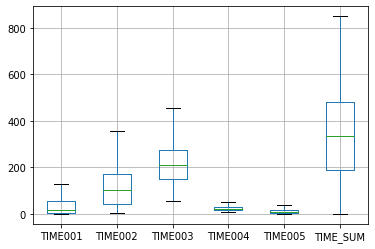

In [17]:
# guess time is meassured in seconds
df.iloc[:, df.columns.get_loc("TIME001"):df.columns.get_loc("TIME001")+6].boxplot(showfliers=False)

In [13]:
df.iloc[:, df.columns.get_loc("TIME001"):df.columns.get_loc("TIME001")+6].describe()

,TIME001,TIME002,TIME003,TIME004,TIME005,TIME_SUM
count,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000
mean,326.602941,165.551471,266.705882,29.882353,24.529412,332.088235
std,1957.199069,502.676139,243.062197,37.107463,49.796020,212.649650
min,2.000000,4.000000,57.000000,9.000000,1.000000,0.000000
25%,6.000000,45.000000,148.750000,16.000000,4.000000,188.500000
50%,16.000000,102.500000,210.000000,20.000000,10.000000,337.500000
75%,55.750000,171.000000,274.500000,30.250000,18.250000,481.750000
max,18674.000000,5850.000000,2216.000000,382.000000,320.000000,1101.000000


In [14]:
# time 004 and time 005 sound unrealistic
# nur auf der seite drei schauen 
# untere drei prozent auf ganze weg;

# Amount of same clicked answers

In [15]:
DATA_PATH = "data2/data_tu-helpfulness-of-xai_2022-06-29_10-48.xlsx"
DATA_PREPARED_PATH = f"{DATA_PATH.split('.')[0]}_PREPARED.{DATA_PATH.split('.')[1]}"
df = pd.read_excel(DATA_PATH)
df= pd.read_excel(DATA_PREPARED_PATH)

df.head()

,Unnamed: 0,case,Education,Education: Other,ML Experience,XAI Experience,Color Blindness,Color Blindness: Yes,Visual Impairment Affect,Feedback Form: [01],question_code,response,label,img_idx,model,method,is_pred_correct
0,0,579,Highschool,NaN,Not at all,NaN,No,NaN,NaN,NaN,B715,False,chiffonier,4389,alex,SHAP,True
1,210,579,Highschool,NaN,Not at all,NaN,No,NaN,NaN,NaN,B702,False,matchstick,6063,vgg,ConfidenceScores,False
2,200,579,Highschool,NaN,Not at all,NaN,No,NaN,NaN,NaN,B703,True,gyromitra,9931,alex,LIME,True
3,30,579,Highschool,NaN,Not at all,NaN,No,NaN,NaN,NaN,B718,False,trifle,9200,alex,ConfidenceScores,False
4,190,579,Highschool,NaN,Not at all,NaN,No,NaN,NaN,NaN,B704,False,Boston_bull,1073,alex,SHAP,False


In [16]:
# more TRUE than FALSE (more people trust XAI?)

df['response'].value_counts()

  

True     1762
False    1502
Name: response, dtype: int64

In [17]:
# check for all true/all false

df_check = df.groupby('case')['response'].apply(list)
df_check

case
579     [False, False, True, False, False, True, True,...
581     [True, False, False, False, True, False, True,...
587     [True, True, False, True, False, False, True, ...
589     [True, True, True, False, False, False, False,...
605     [True, True, True, False, False, True, False, ...
                              ...                        
1626    [False, False, True, True, True, True, True, F...
1654    [True, True, False, False, False, True, True, ...
1656    [False, True, False, False, True, False, True,...
1658    [True, True, True, False, False, False, False,...
1660    [True, True, False, False, True, True, False, ...
Name: response, Length: 136, dtype: object

In [18]:
def all_equal(iterator):

    iterator = iter(iterator)
    try:
        first = next(iterator)
    except StopIteration:
        return True
    return all(first == x for x in iterator)

# no all true/ all false

all_equal(df_check)

False

In [19]:
df

,Unnamed: 0,case,Education,Education: Other,ML Experience,XAI Experience,Color Blindness,Color Blindness: Yes,Visual Impairment Affect,Feedback Form: [01],question_code,response,label,img_idx,model,method,is_pred_correct
0,0,579,Highschool,NaN,Not at all,NaN,No,NaN,NaN,NaN,B715,False,chiffonier,4389,alex,SHAP,True
1,210,579,Highschool,NaN,Not at all,NaN,No,NaN,NaN,NaN,B702,False,matchstick,6063,vgg,ConfidenceScores,False
2,200,579,Highschool,NaN,Not at all,NaN,No,NaN,NaN,NaN,B703,True,gyromitra,9931,alex,LIME,True
3,30,579,Highschool,NaN,Not at all,NaN,No,NaN,NaN,NaN,B718,False,trifle,9200,alex,ConfidenceScores,False
4,190,579,Highschool,NaN,Not at all,NaN,No,NaN,NaN,NaN,B704,False,Boston_bull,1073,alex,SHAP,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3259,2219,1660,Postgraduate,NaN,Between 1 and 3 years,Somewhat helpful,No,NaN,NaN,NaN,B817,True,red-breasted_merganser,9788,alex,ConfidenceScores,False
3260,2327,1660,Postgraduate,NaN,Between 1 and 3 years,Somewhat helpful,No,NaN,NaN,NaN,B801,False,custard_apple,9521,alex,SHAP,True
3261,2207,1660,Postgraduate,NaN,Between 1 and 3 years,Somewhat helpful,No,NaN,NaN,NaN,B822,False,shovel,7702,vgg,gradCAM,False
3262,2159,1660,Postgraduate,NaN,Between 1 and 3 years,Somewhat helpful,No,NaN,NaN,NaN,B810,False,coral_reef,9710,vgg,SHAP,True
